In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

plt.rcParams['figure.figsize'] = 8, 5
plt.style.use("fivethirtyeight")
pd.options.plotting.backend = "plotly"

data1 = pd.read_csv("../input/agricuture-crops-production-in-india/datafile (1).csv")
data2 = pd.read_csv("../input/agricuture-crops-production-in-india/datafile (2).csv")
data3 = pd.read_csv("../input/agricuture-crops-production-in-india/datafile (3).csv")
data0 = pd.read_csv("../input/agricuture-crops-production-in-india/datafile.csv")
production = pd.read_csv("../input/agricuture-crops-production-in-india/produce.csv")

In [2]:
df = data0.copy()
crops = []
production = []
for i in range(df.shape[0]):
    for _ in range(8):
        crops.append(df['Crop'][i])
    production = production + df.loc[i][1:].tolist()
    
years = df.drop('Crop',axis=1).columns.tolist() * 13

df = pd.DataFrame({'Crop':crops, 'Year': years, 'Production': production})
df = df.dropna().reset_index(drop=True)

fig=px.bar(df,x='Crop', y="Production", animation_frame="Year", 
           animation_group="Crop", color="Crop", hover_name="Crop", range_y=[80,150])
fig.update_layout(title="Production rate of Crops per year")
fig.show()

<p style="font-size:15px">The history of Agriculture in India dates back to Indus Valley Civilization and even before that in some places of Southern India. India ranks second worldwide in farm outputs. As per 2018, agriculture employed more than 50℅ of the Indian work force and contributed 17–18% to country's GDP. According to latest report, agriculture is primary source of livelihood for 58% population in India.</p>

<p style="font-size:15px">In 2016, agriculture and allied sectors like animal husbandry, forestry and fisheries accounted for 15.4% of the GDP (gross domestic product) with about 31% of the workforce in 2014. India ranks first in the world with highest net cropped area followed by US and China. The economic contribution of agriculture to India's GDP is steadily declining with the country's broad-based economic growth. Still, agriculture is demographically the broadest economic sector and plays a significant role in the overall socio-economic fabric of India. [Source](https://en.wikipedia.org/wiki/Agriculture_in_India).</p>

In [3]:
df = data1[["Crop","Cost of Cultivation (`/Hectare) A2+FL","Cost of Cultivation (`/Hectare) C2"]].copy()
df = df.groupby('Crop')[["Cost of Cultivation (`/Hectare) A2+FL","Cost of Cultivation (`/Hectare) C2"]].mean().reset_index()
fig = df.plot(kind='bar',x='Crop',y=["Cost of Cultivation (`/Hectare) A2+FL","Cost of Cultivation (`/Hectare) C2"],barmode='group')
fig.update_layout(showlegend=False, title='Cost of Cultivation A2+FL vs C2')
fig.show()

Sugarcane production requires the highest cost of cultivation /hectare

In [4]:
df = data1[["State","Cost of Production (`/Quintal) C2"]].copy()
df = df.groupby('State')[["Cost of Production (`/Quintal) C2"]].mean().reset_index()
fig = df.plot(kind='bar',x='State',y="Cost of Production (`/Quintal) C2", color="Cost of Production (`/Quintal) C2")
fig.update_layout(title="State-wise Cost of Production (`/Quintal) C2")
fig.show()

In [5]:
df = data1[["State","Yield (Quintal/ Hectare) "]].copy()
df = df.groupby('State')[["Yield (Quintal/ Hectare) "]].mean().reset_index()
fig = df.plot(kind='bar',x='State',y="Yield (Quintal/ Hectare) ", color="Yield (Quintal/ Hectare) ")
fig.update_layout(title="State-wise Yield (Quintal/ Hectare)")
fig.show()

Tamil Nadu shows a phenomenal amout of yield of crops.

But one more thing to keep in notice is the yield is decided by Quintal/Hectare.

So if the hectare amount is low compared to other states then also the figures will go high but in reality production won't be that high.

Cost of Cultivation (`/Hectare) Distributions


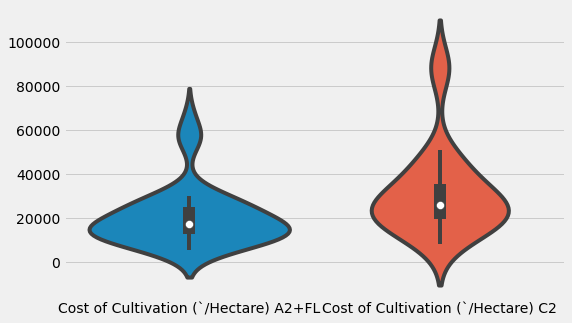

In [6]:
print('Cost of Cultivation (`/Hectare) Distributions')
sns.violinplot(data=data1[["Cost of Cultivation (`/Hectare) A2+FL", "Cost of Cultivation (`/Hectare) C2"]] , size=8)
plt.show()

In the file "datafile (2).csv" there are data for production, area and yield from the years 2006-2011 for various crops.

Each of their growth, fall and correlations can be observed next.

In [7]:
data2 = data2.sort_values('Yield 2010-11', ascending=False).reset_index(drop=True)

The datafile2 consists of 55 different crops but it's not possible to include all of them in visualizations and to maintain the aesthetics of the plot.

So I am working on the 7 highest yielding crops from the dataset.

In [8]:
df = data2[["Crop             ","Production 2006-07","Production 2007-08","Production 2008-09","Production 2009-10","Production 2010-11"]].copy().head(8)

fig = df.drop(0).plot(kind='bar',x='Crop             ', y=["Production 2006-07","Production 2007-08","Production 2008-09","Production 2009-10","Production 2010-11"])
fig.update_layout(title='Production of Crops from 2006 to 2011')

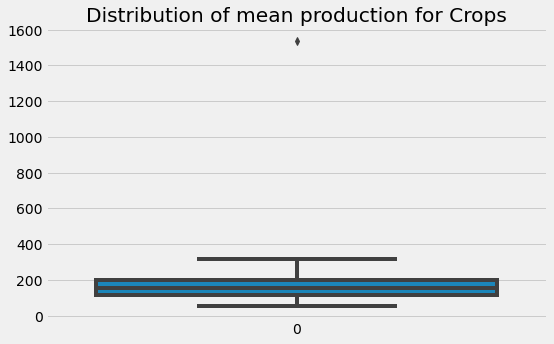

In [9]:
mean_production = []
for i in range(data2.shape[0]):
    mean_production.append((data2.iloc[i,1]+data2.iloc[i,2]+data2.iloc[i,3]+data2.iloc[i,4]+data2.iloc[i,5])/5)
    
data2['mean_production'] = pd.Series(mean_production)
sns.boxplot(data=data2['mean_production'])
plt.title('Distribution of mean production for Crops')
plt.show()

Clearly an outlier can be noticed but it can be assumed that this outlier is for the Total Spices value.

That value is the highest is the data because it is a combination of multiple crop values.

In [10]:
df = data2[["Crop             ","Area 2006-07","Area 2007-08","Area 2008-09","Area 2009-10","Area 2010-11"]].copy().head(8)

fig = df.drop(0).plot(kind='bar',x='Crop             ', y=["Area 2006-07","Area 2007-08","Area 2008-09","Area 2009-10","Area 2010-11"])
fig.update_layout(title='Area of Crops from 2006 to 2011')

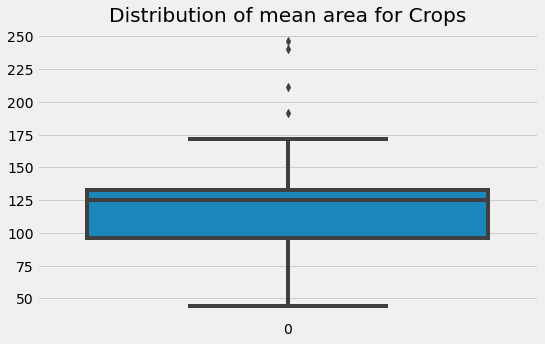

In [11]:
mean_area = []
for i in range(data2.shape[0]):
    mean_area.append((data2.iloc[i,6]+data2.iloc[i,7]+data2.iloc[i,8]+data2.iloc[i,9]+data2.iloc[i,10])/5)
    
data2['mean_area'] = pd.Series(mean_area)
sns.boxplot(data=data2['mean_area'])
plt.title('Distribution of mean area for Crops')
plt.show()